
🔍 Dataset Preview:
   Experience (Years)  Training Hours    Salary ($)  Advertising Budget ($)  \
0                  15              28  73580.856328                    7770   
1                  12              30  69451.814558                    1360   
2                   9              14  58529.124297                    5890   
3                  10              27  58338.348745                    5691   
4                  12              37  71640.767452                    6234   

   Sales Revenue ($)  Customer Age  Credit Score  Purchased (0/1)  
0      -1.186231e+06            33           662                0  
1      -3.405502e+04            23           736                0  
2      -6.593519e+05            25           381                0  
3      -6.167763e+05            42           655                0  
4      -7.576391e+05            35           557                0   

📌 Available Columns: ['Experience (Years)', 'Training Hours', 'Salary ($)', 'Advertising Budget

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


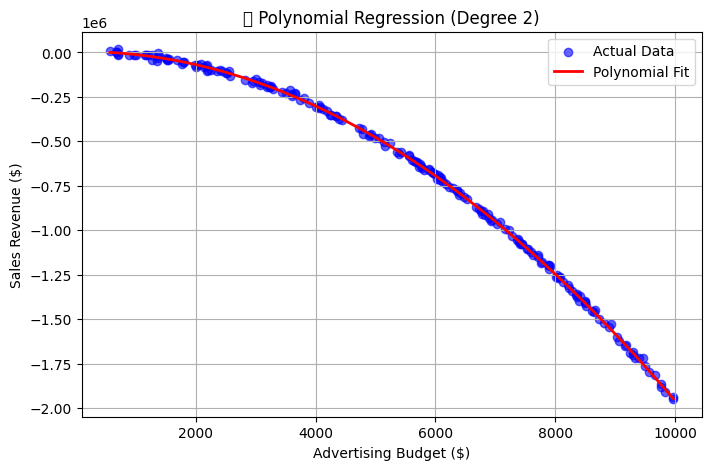

❌ Logistic Regression needs at least 2 classes, but found only [0]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
def load_dataset(filename):
    df = pd.read_csv(filename)
    print("\n🔍 Dataset Preview:")
    print(df.head(), "\n")
    
    print("📌 Available Columns:", list(df.columns), "\n")
    return df

# Polynomial Regression
def polynomial_regression(df, feature_column, target_column, degree=2):
    if feature_column not in df.columns or target_column not in df.columns:
        print(f"❌ Column '{feature_column}' or '{target_column}' not found in dataset!")
        return

    X = df[[feature_column]].values
    y = df[target_column].values
    
    # Transform input data to include polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    
    # Train model
    model = LinearRegression()
    model.fit(X_poly, y)
    
    # Predictions
    X_sorted = np.sort(X, axis=0)
    X_sorted_poly = poly.transform(X_sorted)
    y_pred = model.predict(X_sorted_poly)
    
    # Visualization
    plt.figure(figsize=(8, 5))
    plt.scatter(X, y, color='blue', label="Actual Data", alpha=0.6)
    plt.plot(X_sorted, y_pred, color='red', label="Polynomial Fit", linewidth=2)
    plt.xlabel(feature_column)
    plt.ylabel(target_column)
    plt.legend()
    plt.title(f"📈 Polynomial Regression (Degree {degree})")
    plt.grid()
    plt.show()

# Logistic Regression
def logistic_regression(df, feature_columns, target_column):
    if target_column not in df.columns or any(col not in df.columns for col in feature_columns):
        print(f"❌ Column(s) '{feature_columns}' or '{target_column}' not found in dataset!")
        return

    X = df[feature_columns].values
    y = df[target_column].values
    
    # Standardize data
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Ensure at least two classes exist
    unique_classes = np.unique(y)
    if len(unique_classes) < 2:
        print(f"❌ Logistic Regression needs at least 2 classes, but found only {unique_classes}")
        return
    
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n✅ Logistic Regression Accuracy: {accuracy:.2f}\n")

# Load dataset (replace with actual filename)
df = load_dataset("pr_lr_dataset.csv")  # Ensure correct dataset filename

# Polynomial Regression
polynomial_regression(df, feature_column="Advertising Budget ($)", target_column="Sales Revenue ($)", degree=2)

# Logistic Regression
logistic_regression(df, feature_columns=["Customer Age", "Credit Score"], target_column="Purchased (0/1)")


In [8]:
import pandas as pd

df = pd.read_csv("pr_lr_dataset.csv")  # Load your dataset

print(df["Purchased (0/1)"].value_counts())  # Count occurrences of each class


Purchased (0/1)
0    149
1     51
Name: count, dtype: int64


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


NameError: name 'X_scaled' is not defined